# Image Classification

Import load_digits() from the sklearn.datasets package.

Transform the NumPy 2D array into a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline


digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
data = pd.DataFrame(digits['data'])
data.head()

labels = pd.Series(digits.target)

Use matplotlib to visualize some of the images in the dataset.

- Generate a scatter plot grid, with 2 rows and 4 columns.
- In the first row:

 - Display the images corresponding to rows 0, 100, 200, and 300.
- In the second row:
 - Display the images corresponding to rows 1000, 1100, 1200, and 1300.

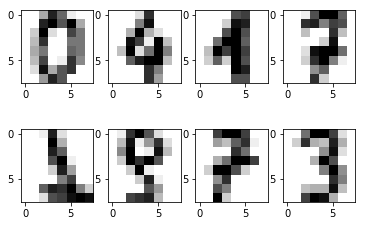

In [4]:
def get_image(location):
    image = data.iloc[location]
    np_image = image.values
    np_image = np_image.reshape(8,8)
    plt.imshow(np_image, cmap='gray_r')
    plt.show()
    

f, ax = plt.subplots(2, 4)

for row in [0, 1]:
    for i in range(4):
        ax[row, i].imshow(data.iloc[i*100+row*1000].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors

Split up the data into train and test sets.

Setup a pipeline for testing and training k-nn models.

- Write a function named train() that uses KNeighborsClassifer for training k-nearest neighbors models.
- Write a function named test() that tests the model.
- Write a function named cross_validate() that performs 4-fold cross validation using train() and test().

Experiment with different values for k and plot the resulting classification accuracies.

1 0.9677233358079684
2 0.9616010888393962
3 0.9627183865379857
4 0.9649480326651819
5 0.9621665429349171
6 0.9588270230141054
7 0.9571591190299431
8 0.9571578817124474
9 0.9543801039346697


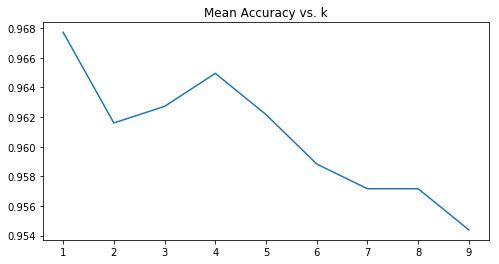

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_knn(n_neighbors, features, labels):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(features, labels)
    return knn

def test_model(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame({'correct_label': test_labels, 'predicted_label': predictions})
    accuracy = sum(train_test_df.correct_label == train_test_df.predicted_label)/len(train_test_df)
    return accuracy

def cross_validate(k):
    fold_acc = []
    kf = KFold(n_splits=4, random_state=2)
    for train_idx, test_idx in kf.split(data):
        train_features = data.loc[train_idx]
        test_features = data.loc[test_idx]
        
        #notice that len(labels) == len(data)
        train_labels = labels.loc[train_idx]
        test_labels = labels.loc[test_idx]
        
        model = train_knn(k, train_features, train_labels)
        accuracy = test_model(model, test_features, test_labels)
        fold_acc.append(accuracy)
    return fold_acc

#knn_one_accuracies = cross_validate(9)
np.mean(knn_one_accuracies)

k_values = range(1,10)
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    print(k, k_mean_accuracy)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)
plt.savefig('Figures/k_nearest_neighbors_kfolds.png')

## Neural Networks

### One hidden layer

Using 4-fold cross validation:

- Train and test a neural network model using a single hidden layer of 8 neurons.
- Train and test a neural network model using a single hidden layer of 16 neurons.
- Train and test a neural network model using a single hidden layer of 32 neurons.
- Train and test a neural network model using a single hidden layer of 64 neurons.
- Train and test a neural network model using a single hidden layer of 128 neurons.
- Train and test a neural network model using a single hidden layer of 256 neurons.

Create a new Markdown cell summarizing what you saw.

- Rank the performance of the models by the overall accuracies.
- Which models, if any, start to overfit?
 - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

C:\Users\josep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\josep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\josep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\josep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

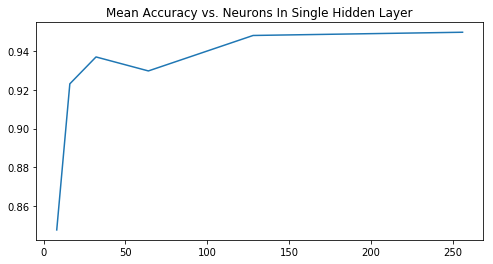

In [45]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)
plt.savefig('Figures/one_hidden.png')

Increasing the number of neurons in the hidden layer greatly increased our accuracy. One would expect adding more hidden layers would increase our accuracy (which we will do next)

### 2 hidden layers

- Modify the neural network training pipeline to use 2 hidden layers instead in the network.
- Using 4-fold cross validation:
 - Train a neural network model using 2 hidden layers:
   - 64 neurons in the first hidden layer.
   - 64 neurons in the second hidden layer.

Create a new Markdown cell summarizing what you saw.

- Rank the performance of the models by the overall accuracies.
- Which models, if any, start to overfit?
 - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [21]:

neuron_arch

(64, 64)

In [24]:
fold_accuracies = []
kf = KFold(n_splits=4)


In [25]:
for train_index, test_index in kf.split(data):
    train_features = data.loc[train_index]
    test_features = data.loc[test_index]

    train_labels = data.loc[train_index]
    test_labels = data.loc[test_index]

    nn = train_nn(neuron_arch, train_features, train_labels)
    accuracy = score(nn, test_features, test_labels)

    fold_accuracies.append(accuracy)

ValueError: Multioutput target data is not supported with label binarization

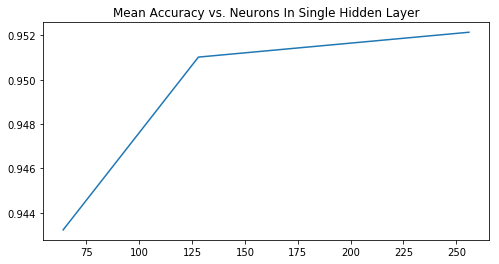

In [44]:
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def score(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = sum(predictions == test_labels)/len(test_features)
    return accuracy

def cross_validate(neuron_arch, k_folds=4):
    fold_accuracies = []
    kf = KFold(n_splits=k_folds)
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        
        nn = train_nn(neuron_arch, train_features, train_labels)
        accuracy = score(nn, test_features, test_labels)
        
        fold_accuracies.append(accuracy)
    return fold_accuracies

nn_one_accuracies = []
neurons = [(i,i) for i in [64,128,256]]
for neuron_arch in neurons:
    fold_accuracies = cross_validate(neuron_arch)
    nn_one_accuracies.append(np.mean(fold_accuracies))

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i for i, _ in neurons]
plt.plot(x, nn_one_accuracies)
plt.savefig('Figures/two_hidden.png')

Introducing a second layer increases prediction accuracy. 

## Introducing more hidden layers and K-Folds

- Modify the neural network training pipeline to use 6 fold cross validation instead.
- Train a neural network model using 3 hidden layers:
 - 10 neurons in the first hidden layer.
 - 10 neurons in the second hidden layer.
 - 10 neurons in the third hidden layer.
- Train a neural network model using 3 hidden layers:
 - 64 neurons in the first hidden layer.
 - 64 neurons in the second hidden layer.
 - 64 neurons in the third hidden layer.
- Train a neural network model using 3 hidden layers:
 - 128 neurons in the first hidden layer.
 - 128 neurons in the second hidden layer.
 - 128 neurons in the third hidden layer.
 
Create a new Markdown cell summarizing what you saw.

- Rank the performance of the models by the overall accuracies.
- Which models, if any, start to overfit?
 - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [40]:
def nn_train(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def predict_and_score(model, test_features, test_labels):
    predictions = model.predict(test_features)
    return sum(predictions == test_labels)/len(predictions)

def cross_validate(neuron_arch, k_folds=6):
    acc_scores = []
    kf = KFold(n_splits=k_folds)
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        
        nn = nn_train(neuron_arch, train_features, train_labels)
        score = predict_and_score(nn, test_features, test_labels)
        
        acc_scores.append(score)
    return acc_scores

n = 3
neurons = [[i for _ in range(n)] for i in [10,64,128]]

nn_three_accs = []
for neuron_arch in neurons:
    nn_mean_acc = np.mean(cross_validate(neuron_arch))
    nn_three_accs.append(nn_mean_acc)

C:\Users\josep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\josep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\josep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\josep\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

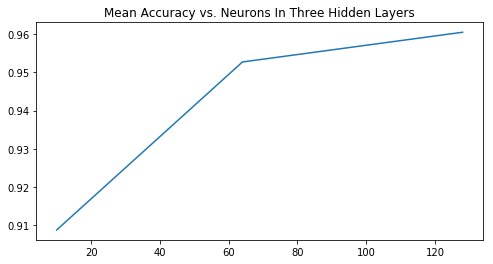

In [43]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i for i, *_ in neurons]
plt.plot(x, nn_three_accs)
plt.savefig('Figures/three_hidden.png')

Using 3 hidden layers increases the mean accuracy up to about 96%. This project shows increasing layers and neurons in each layer generally increases accuracy.